# Figure 1: Region Identification // Data Overview

In [1]:
import sys, os
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

import tools.utilities as utils


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# REGIONS
loc_hcs = [61.8, 62.2]
loc_hcs1 = [357.5, 358]
ssw = [9, 19]
fsw = [42, 52]

# COLORS - 'azure'
cc = ['lightpink', 'mediumspringgreen', 'peachpuff', 'powderblue', 'thistle', 'palegoldenrod']
scol, hcol, fcol, rcol = ['lavender', 'azure', 'lavenderblush', 'grey']
cc = ['black', 'red', 'blue', 'green']
clight = ['lightgrey', '#E6A8C9', '#E6A8C9', '#A8E6BF']

# DIRECTORIES
RES_DIR = os.path.join('/Users/tamarervin/', 'e15_results')
FIG_DIR = os.path.realpath('figures')
PlotDir = '/Users/tamarervin/mplstyle/'



# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 5


enc='E15'


## Read in Data

In [8]:
# ### READ IN DATA ###
parker, parkerdownt, parkerdownl, pss, orbiter, orbiterdownl, orbiterdownt, oss, wind, winddownt, winddownl, wss = utils.read_data(RES_DIR, sigma_time=20, pp='parker20min.csv')

### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
hhcs1 = np.logical_and(lon_footpoints >= loc_hcs1[0], lon_footpoints <=loc_hcs1[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

09-Jan-24 16:10:52: /Users/tamarervin/publications/e15/tools/utilities.py:169: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()

09-Jan-24 16:10:52: /Users/tamarervin/publications/e15/tools/utilities.py:169: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()

09-Jan-24 16:10:54: /Users/tamarervin/publications/e15/tools/utilities.py:178: FutureWarning: 'loffset' in .resample() and in Grouper() is d

In [3]:
print('The sub-Alfvenic region is from', parker.Time[slow].iloc[0], parker.Time[slow].iloc[-1])
print('The sub-Alfvenic region is from', ((parker.rAU[slow].iloc[0])*u.AU).to(u.Rsun), ((parker.rAU[slow].iloc[-1])*u.AU).to(u.Rsun))

print('The fast wind stream is from', parker.Time[fast].iloc[0], parker.Time[fast].iloc[-1])
print('The HCS crossing  is from', parker.Time[hhcs].iloc[0], parker.Time[hhcs].iloc[-1])
print('The HCS crossing is from', parker.Time[hhcs1].iloc[0], parker.Time[hhcs1].iloc[-1])

The sub-Alfvenic region is from 2023-03-16 11:55:01.801250 2023-03-17 05:57:20.337802
The sub-Alfvenic region is from 21.91665176481804 solRad 15.597817747553572 solRad
The fast wind stream is from 2023-03-17 15:05:21.302677 2023-03-17 18:37:03.109332
The HCS crossing  is from 2023-03-17 20:38:49.969248 2023-03-17 21:59:46.645675
The HCS crossing is from 2023-03-16 03:00:28.497049 2023-03-16 07:31:32.722470


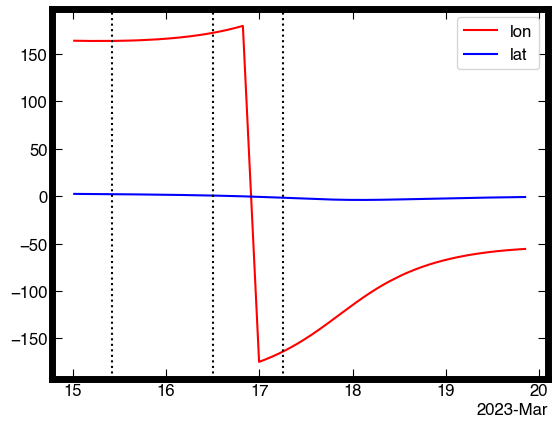

In [39]:
parker['Rsun'] = (np.array(parker.rAU)*u.AU).to(u.Rsun)
plt.plot(parker.Time, parker.lon - 180, c='red', label='lon')
plt.plot(parker.Time, parker.lat, c='b', label='lat')
plt.axvline(pd.Timestamp('2023-03-15 10:00'), c='k', linestyle='dotted')
plt.axvline(pd.Timestamp('2023-03-16 12:00'), c='k', linestyle='dotted')
plt.axvline(pd.Timestamp('2023-03-17 06:00'), c='k', linestyle='dotted')
plt.legend()

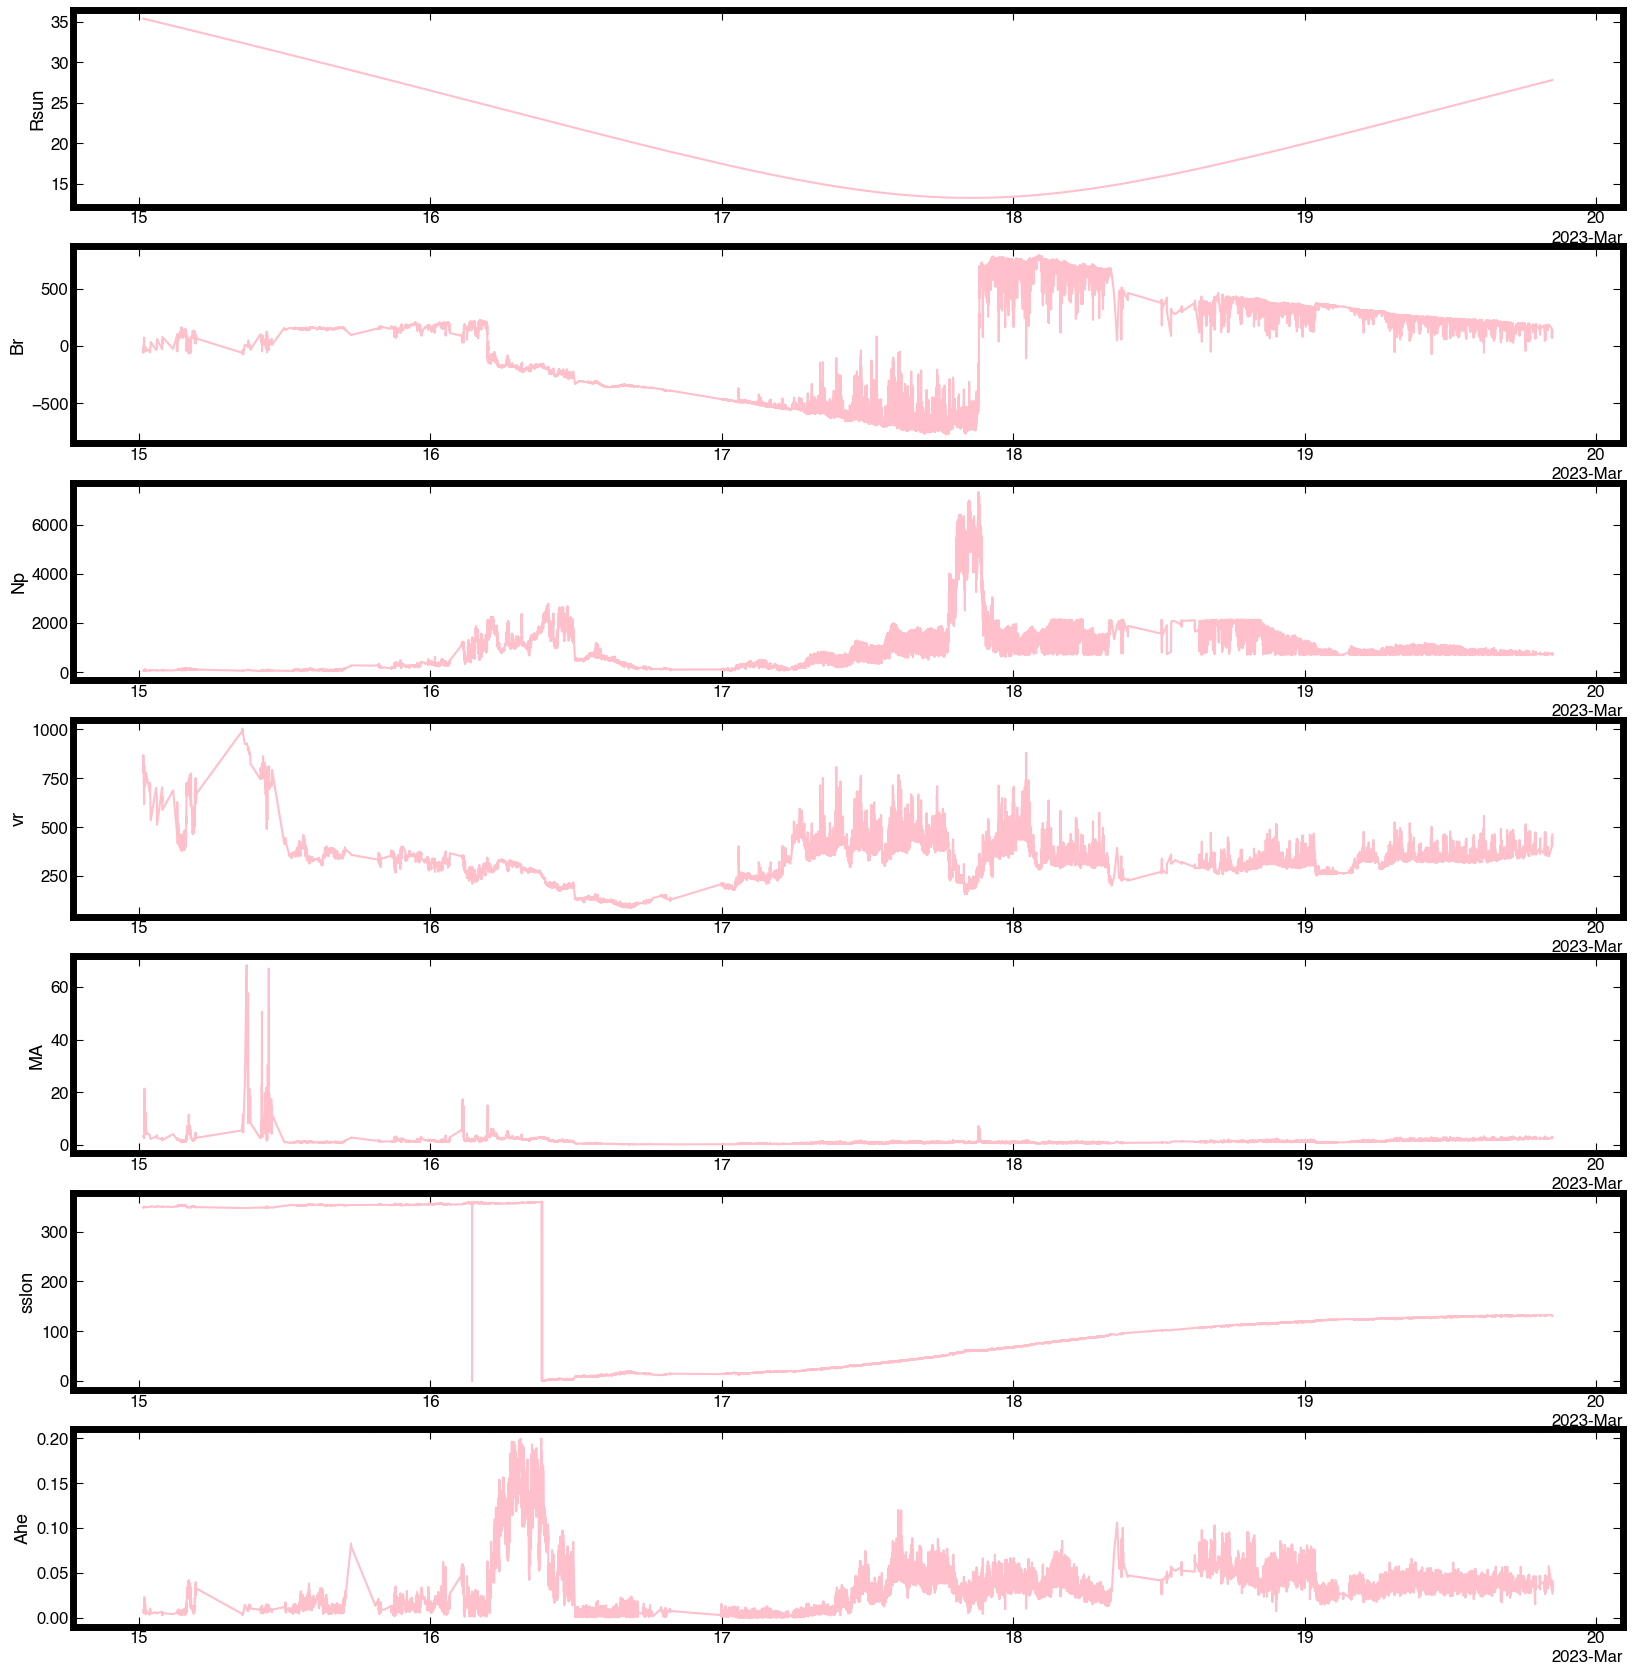

In [34]:
datas = ['Rsun', 'Br', 'Np', 'vr', 'MA', 'sslon', 'Ahe']
fig, axs = plt.subplots(len(datas), figsize=[20, len(datas)*3])

for i, vv in enumerate(datas):
    axs[i].plot(parker.Time, parker[vv], color='pink')
    axs[i].set(ylabel=vv)
# axs[-2].set_yscale('log')
# axs[-2].axhline(1, c='k')

In [11]:
import glob
path = glob.glob(os.path.join(os.path.realpath(os.path.join('psp_data', 'sweap/spi/l3/spi_sf00_l3_mom')), "*"), recursive=True)
files = glob.glob(os.path.join(path[0], '*'))

[]

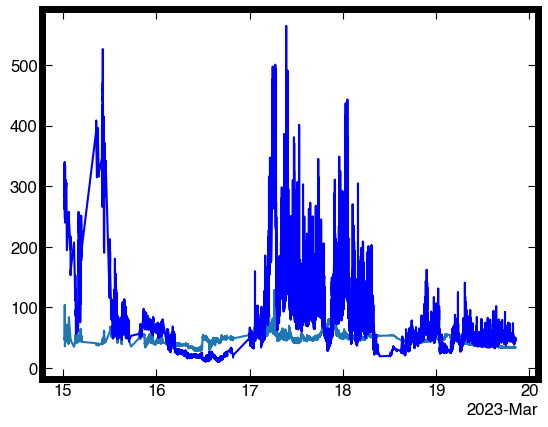

In [61]:
# plt.plot(parker.Time, (np.array(parker.rAU)*u.AU).to(u.Rsun))
plt.plot(parker.Time, parker.Te)
plt.plot(parker.Time, parker.Tp, c='b')

# LASCO Stuff

In [43]:
### TIME OF CME TO HIT PSP
### we have: time of eruption, estimated velocity, PSP position
Terupt = [pd.Timestamp('2023-03-15 06:48:00'), pd.Timestamp('2023-03-15 06:48:00')]
CME_vel = [400*u.km/u.s, 750*u.km/u.s]
psp_pos = np.linspace(15, 30) * u.Rsun

### velocity = psp_pos / time delta  -> time delta = psp_pos / velocity
time_delta, psp_time = [], []
for i, vv in enumerate(CME_vel):
    time_delta.append((psp_pos / vv).to(u.s))
    ### PSP time = Terupt + time delta
    psp_time.append([Terupt[i] + datetime.timedelta(seconds=tt.value) for tt in time_delta[i]])
psp_time[1]

[Timestamp('2023-03-15 10:39:54'),
 Timestamp('2023-03-15 10:44:37.959184'),
 Timestamp('2023-03-15 10:49:21.918367'),
 Timestamp('2023-03-15 10:54:05.877551'),
 Timestamp('2023-03-15 10:58:49.836735'),
 Timestamp('2023-03-15 11:03:33.795918'),
 Timestamp('2023-03-15 11:08:17.755102'),
 Timestamp('2023-03-15 11:13:01.714286'),
 Timestamp('2023-03-15 11:17:45.673469'),
 Timestamp('2023-03-15 11:22:29.632653'),
 Timestamp('2023-03-15 11:27:13.591837'),
 Timestamp('2023-03-15 11:31:57.551020'),
 Timestamp('2023-03-15 11:36:41.510204'),
 Timestamp('2023-03-15 11:41:25.469388'),
 Timestamp('2023-03-15 11:46:09.428571'),
 Timestamp('2023-03-15 11:50:53.387755'),
 Timestamp('2023-03-15 11:55:37.346939'),
 Timestamp('2023-03-15 12:00:21.306122'),
 Timestamp('2023-03-15 12:05:05.265306'),
 Timestamp('2023-03-15 12:09:49.224490'),
 Timestamp('2023-03-15 12:14:33.183673'),
 Timestamp('2023-03-15 12:19:17.142857'),
 Timestamp('2023-03-15 12:24:01.102041'),
 Timestamp('2023-03-15 12:28:45.061224'),

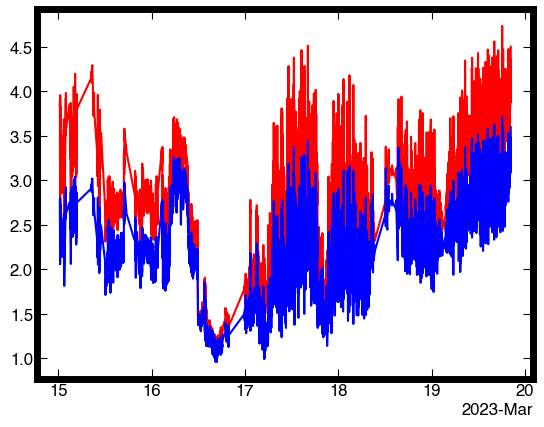

In [64]:
from plasmapy.formulary import beta, magnetic_pressure, thermal_pressure, ion_sound_speed
from astropy.constants import k_B
ff = parker.copy()
sound_speed = ion_sound_speed(
    T_e=np.array(ff.Te)*u.eV/k_B,
    T_i=np.array(ff.Tp)*u.eV/k_B,
    # n_e=np.array(ff.Ne)/(u.cm**3),
    # k=k_2,
    ion='p',
    gamma_e=1.38,
    gamma_i=1.38,
).to(u.km/u.s).value

ff['MS'] = ff.vr / sound_speed
ff['MMS'] = ff.vr / np.sqrt(sound_speed**2 + ff.vA**2)

plt.plot(ff.Time, ff.MS, c='red')
plt.plot(parker.Time, parker.MS, c='b')

In [5]:
### FIND TIME WHEN FSW PLASMA LEFT SURFACE
use = np.logical_and(parker.sslon >= ssw[0], parker.sslon <= ssw[1])
times = parker.Time[use]
vels = parker.vr[use] * u.km/u.s
rads = (np.array(parker.rAU[use]) * u.au).to(u.km)

deltaT = np.array(rads / vels)
Tsun = [timestamp - datetime.timedelta(seconds=seconds) for timestamp, seconds in zip(times, deltaT)]

fsw_times = pd.DataFrame(data={'Tparker': times, 'Tsun':Tsun, 'vr': vels})
fsw_times

,Tparker,Tsun,vr
Time,,,
2023-03-16 11:55:01.801250,2023-03-16 11:55:01.801250,2023-03-15 04:42:18.350540,135.69728
2023-03-16 11:55:05.296490,2023-03-16 11:55:05.296490,2023-03-15 04:46:51.793411,136.02176
2023-03-16 11:55:08.791791,2023-03-16 11:55:08.791791,2023-03-15 05:06:09.617967,137.43474
2023-03-16 11:55:12.287032,2023-03-16 11:55:12.287032,2023-03-15 04:16:42.556513,133.84842
2023-03-16 11:55:19.277573,2023-03-16 11:55:19.277573,2023-03-15 04:51:27.530770,136.33087
...,...,...,...
2023-03-17 05:15:09.764697,2023-03-17 05:15:09.764697,2023-03-16 21:11:58.890991,379.18634
2023-03-17 05:16:02.193728,2023-03-17 05:16:02.193728,2023-03-16 20:52:38.280844,363.85916
2023-03-17 05:55:59.946665,2023-03-17 05:55:59.946665,2023-03-17 00:14:22.460107,529.61790


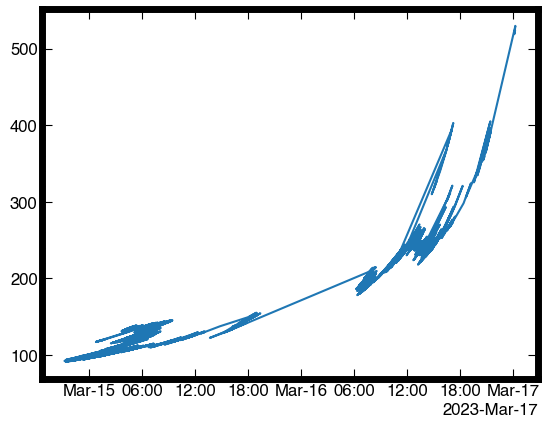

In [9]:
plt.plot(fsw_times.Tsun, fsw_times.vr)

# LASCO

In [2]:
from datetime import datetime

import hvpy
import matplotlib.pyplot as plt
from hvpy.datasource import DataSource

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
from sunpy.coordinates import Helioprojective
from sunpy.map import Map
from sunpy.util.config import get_and_create_download_dir

import sys, os
import glob
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import astrospice
import sunpy 
from astropy.coordinates import SkyCoord

import tools.utilities as utils
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs

from sunpy.map.header_helper import make_heliographic_header

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

09-Jan-24 15:33:45: /Users/tamarervin/miniconda3/envs/analysis/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [3]:
lasco_jp2_file = hvpy.save_file(hvpy.getJP2Image(datetime(2023, 3, 15, 6, 48),
                                                 DataSource.LASCO_C2.value),
                                filename=get_and_create_download_dir() + "/LASCO_C2.jp2", overwrite=True)
lasco_map = Map(lasco_jp2_file)

TypeError: 'module' object is not callable

In [13]:


# get carrington locations at these timestamps for each instrument
### Create SkyCoord for PSP in the inertial (J2000) frame
psp_inertial = astrospice.generate_coords(
    'SOLAR PROBE PLUS', parker.Time
)
### Transform to solar co-rotating frame 
psp_carrington = psp_inertial.transform_to(
    sunpy.coordinates.HeliographicCarrington(observer="self")
)

# projectionpsp_coords_carr,vr_arr=np.array(vel)*u.km/u.s, r_inner=2.5*u.Rsun
psp_projected = psp_funcs.ballistically_project(psp_carrington,vr_arr=np.array(parker.vr)*u.km/u.s, r_inner=2.5*u.Rsun)

In [4]:
cor2_file = hvpy.save_file(hvpy.getJP2Image(datetime(2023, 3, 15, 3, 48),
                                            hvpy.DataSource.COR2_A.value),
                           get_and_create_download_dir() + "/COR2.jp2", overwrite=True)
cor2_map = sunpy.map.Map(cor2_file)

TypeError: 'module' object is not callable

In [8]:
# cor2_file = hvpy.save_file(hvpy.getJP2Image(datetime(2022, 2, 26, 00, 34),
#                                             hvpy.DataSource.COR2_A.value),
#                            get_and_create_download_dir() + "/COR2.jp2", overwrite=True)
# cor2_map = sunpy.map.Map(cor2_file)

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(projection=lasco_map)
lasco_map.plot(axes=ax)

### PLOT PARKER
# dt_start,dt_end = datetime(2022,2,25), datetime(2022,2,26)
# dt_common = utils.gen_dt_arr(dt_start, dt_end, cadence_days=1/48)
# psp_inertial = astrospice.generate_coords(
#     'SOLAR PROBE PLUS', datetime(2023,3,16)
# )

### GET PSP AT STEREO RADIUS
psp_stereo = psp_funcs.ballistically_project(psp_carrington[slow],vr_arr=np.array(parker.vr[slow])*u.km/u.s, r_inner=2.5*u.Rsun)

### PLOT COORDINATES
slow = np.logical_and(psp_projected.lon.value>=ssw[0], psp_projected.lon.value <=ssw[1])
# fl_slow = np.logical_and(flines.open_field_lines.source_surface_feet.lon.value>=165, flines.open_field_lines.source_surface_feet.lon.value <=175)
# sourcesurface = SkyCoord(flines.open_field_lines.source_surface_feet.lon[fl_slow], flines.open_field_lines.source_surface_feet.lat[fl_slow], frame=flines.open_field_lines.source_surface_feet.frame).transform_to(cor2_map.coordinate_frame)
# solarfeet = SkyCoord(flines.open_field_lines.solar_feet.lon.to(u.arcsec)[fl_slow], flines.open_field_lines.solar_feet.lat.to(u.arcsec)[fl_slow], frame=flines.open_field_lines.solar_feet.frame).transform_to(cor2_map.coordinate_frame)
pspcarr = SkyCoord(psp_carrington.lon[slow], psp_carrington.lat[slow], psp_carrington.radius[slow], frame=psp_carrington.frame[slow][0]).transform_to(lasco_map.coordinate_frame)
pspstereo = SkyCoord(psp_stereo.lon, psp_stereo.lat, psp_stereo.radius, frame=psp_stereo.frame).transform_to(lasco_map.coordinate_frame)

ax.plot_coord(pspstereo[0], color='green', marker='*', markersize=6, zorder=3)
# ax.plot_coord(pspcarr[0], color='k', marker='*', markersize=6, zorder=3)

# ax.set_title(r'$\rm COR2-A \; White \; Light$', fontsize=20)
# ax.plot_coord(sourcesurface[0], color='purple', marker='*', zorder=3)
# ax.plot_coord(solarfeet[:2], color=scol, marker='D', zorder=3)

NameError: name 'lasco_map' is not defined

<Figure size 1200x600 with 0 Axes>

# AIA Image

In [6]:
### DOWNLOAD AIA IMAGES

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import sunpy.visualization.colormaps as cm

from sunpy.map.header_helper import make_heliographic_header
from astropy.coordinates import SkyCoord

# data parameters
cadence = a.Sample(10*u.minute)  # querying cadence
start_date = '2023-03-15T06:00:00'  # start date of query
end_date = '2023-03-15T07:00:00'  # end date of query

# query data
aia_result = Fido.search(a.Time(start_date, end_date),
                     a.Instrument.aia, a.Wavelength(193 * u.angstrom), cadence)
file_download = Fido.fetch(aia_result)
map_seq = sunpy.map.Map(sorted(file_download))

# read result dataframe
aia_result

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

aia_lev1_193a_2023_03_15t06_10_04_84z_image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

aia_lev1_193a_2023_03_15t06_20_04_84z_image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

aia_lev1_193a_2023_03_15t06_30_04_84z_image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

aia_lev1_193a_2023_03_15t06_40_04_84z_image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

aia_lev1_193a_2023_03_15t06_50_04_84z_image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2023-03-15 06:00:04.000,2023-03-15 06:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2023-03-15 06:10:04.000,2023-03-15 06:10:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2023-03-15 06:20:04.000,2023-03-15 06:20:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2023-03-15 06:30:04.000,2023-03-15 06:30:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2023-03-15 06:40:04.000,2023-03-15 06:40:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2023-03-15 06:50:04.000,2023-03-15 06:50:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


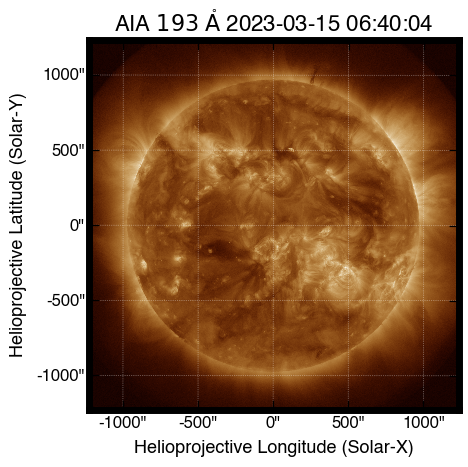

In [13]:
map_seq[4].plot()

[731.5 735.5 739.5 743.5] [287.5 279.5 271.5 263.5]
<SkyCoord (HeliographicCarrington: obstime=2023-03-15T06:40:04.840, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2023-03-15T06:40:04.840, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00485656, -7.16882763, 1.48782733e+11)>): (lon, lat) in deg
    [(3., -18.), (4., -20.), (5., -22.), (6., -24.)]>


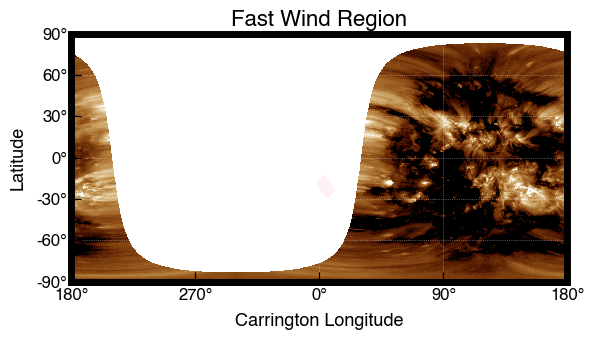

In [41]:
### FAST WIND!!!!
### SUBMAP CREATION
aia_map = map_seq[4]
shape = (720, 1440)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')
outmap = aia_map.reproject_to(carr_header)
bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
fsw_submap = outmap # outmap.submap(bottom_left, width=30*u.degree, height=40*u.degree)
fig = plt.figure()
ax = fig.add_subplot(projection=fsw_submap)

## FIGURE
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),20), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
fsw_submap.plot(axes=ax, norm=lognorm)

### PLOT FOOTPOINTS
# fast = np.logical_and(parker.sslon >= ssw[0], parker.sslon <=ssw[1])
coords = SkyCoord(lon=np.array([3, 4, 5, 6])*u.deg, lat=np.array([-18, -20, -22, -24])*u.deg, frame=fsw_submap.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(fsw_submap.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=fcol, linewidth=2)
ax.set_title('Fast Wind Region')
print(pixel_coords_x, pixel_coords_y)
print(coords)


ValueError: Unrecognized keyword argument(s) 'lon', 'lat'

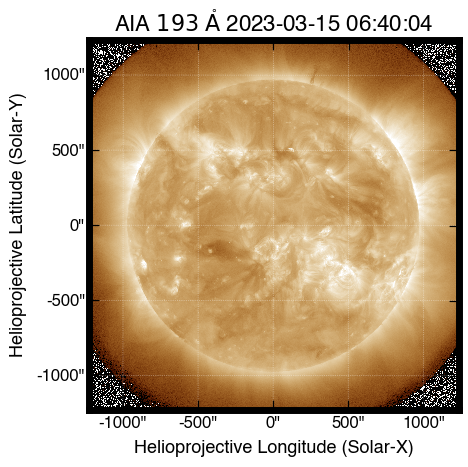

In [18]:
### FAST WIND!!!!
### SUBMAP CREATION
aia_map = map_seq[4]
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)

## FIGURE
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(aia_map.data.flatten(),5), 
                        vmax=np.nanpercentile(aia_map.data.flatten(),99.9))
aia_map.plot(axes=ax, norm=lognorm)

### PLOT FOOTPOINTS
coords = SkyCoord(lon=np.array([3, 4, 5, 6])*u.deg, lat=np.array([-18, -20, -22, -24])*u.deg, frame=aia_map.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(aia_map.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=fcol, linewidth=2)
ax.set_title('Fast Wind Region')



Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2023-03-15 06:40:04
Exposure Time,2.000034 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600714 0.600714] arcsec / pix
Reference Pixel,[2039.594482 2041.147461] pix

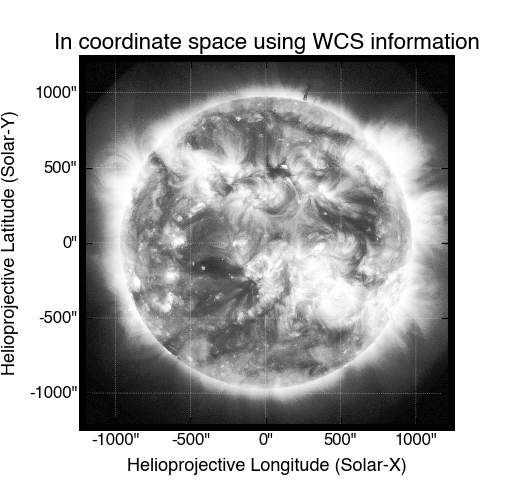
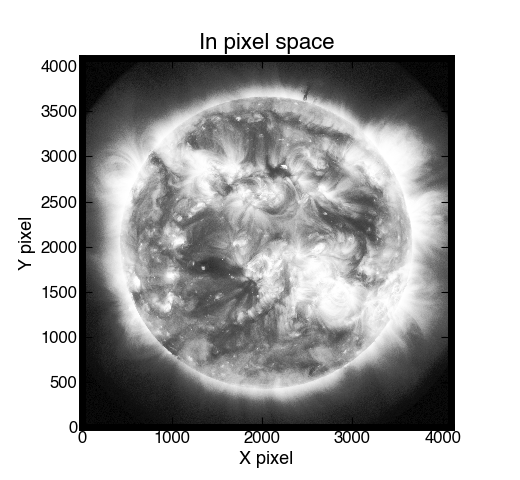
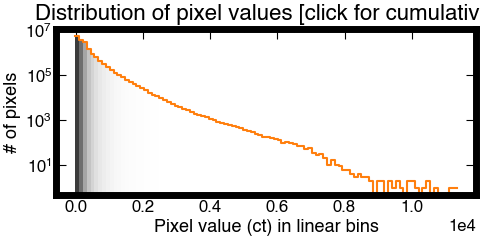
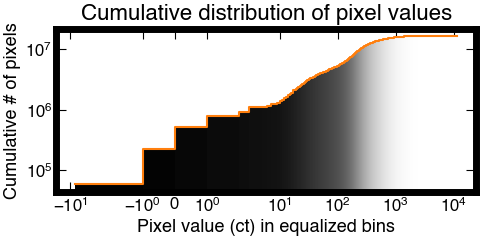

In [22]:
aia_map

In [24]:
# download/read in magnetogram
rss=2.5
local_path = '/Volumes/TAMARUSB/pub_data/adapt-gong/'
files = sorted(glob.glob(os.path.join(local_path, '*.fts.gz')))
filepath = files[1]

# create magnetogram
adapt_magnetogram = pfss_funcs.adapt2pfsspy(filepath, return_magnetogram=True)
gong_map = sunpy.map.Map(adapt_magnetogram.data/1e5, adapt_magnetogram.meta)

# run PFSS model
pfss_model = pfss_funcs.adapt2pfsspy(filepath,rss)

# trace PFSS lines
flines = pfss_funcs.pfss2flines(pfss_model)

# get PSP at source surface
pdatetimes = parker.Time

# get inertial PSP coordinates 
psp_coords_inertial = astrospice.generate_coords('SOLAR PROBE PLUS', pdatetimes)

# Transform to Heliographic Carrington, i.e. the frame that co-rotates with the Sun.
psp_coords_carr = psp_coords_inertial.transform_to(
sunpy.coordinates.HeliographicCarrington(observer="self"))

# get psp longitude and latitude at source surface
psp_at_source_surface = psp_funcs.coord_projection(psp_coords_carr, rss, pdatetimes)

In [25]:
# get Br at the source surface from the pfss model
pfss_br = pfss_model.source_surface_br

# get HCS
hcs = pfss_model.source_surface_pils[0]

# get trajectory 
polarity = np.sign(parker.BrR2)
pos = np.where(polarity == 1)
neg = np.where(polarity == -1)

# get field lines
flines_psp = pfss_funcs.pfss2flines(pfss_model, skycoord_in=psp_at_source_surface)

In [29]:
df = pd.DataFrame()
use = np.where(flines_psp.connectivities == 1)[0]
df['sslon'] = flines_psp.open_field_lines.source_surface_feet.lon.value
df['sslat'] = flines_psp.open_field_lines.source_surface_feet.lon.value
df['flon'] = flines_psp.open_field_lines.solar_feet.lon.value
df['flat'] = flines_psp.open_field_lines.solar_feet.lat.value

Text(0.5, 1.0, 'SA Period')

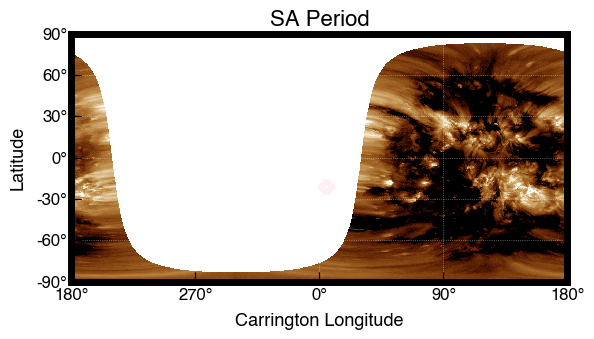

In [30]:
### FAST WIND!!!!
### SUBMAP CREATION
aia_map = map_seq[4]
shape = (720, 1440)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')
outmap = aia_map.reproject_to(carr_header)
bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
fsw_submap = outmap # outmap.submap(bottom_left, width=30*u.degree, height=40*u.degree)
fig = plt.figure()
ax = fig.add_subplot(projection=fsw_submap)

## FIGURE
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),20), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
fsw_submap.plot(axes=ax, norm=lognorm)


### PLOT FOOTPOINTS
fast = np.logical_and(df.sslon >= ssw[0], df.sslon <=ssw[1])
coords = SkyCoord(lon=np.array(df.flon[fast])*u.deg, lat=np.array(df.flat[fast])*u.deg, frame=fsw_submap.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(fsw_submap.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=fcol, linewidth=2)
ax.set_title('SA Period')

